In [51]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import datetime

In [52]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [53]:
dfGender = pd.read_csv('singers_gender (1).csv', encoding= 'latin1') 
print(df1)

                  gender
Performer               
12 Gauge            male
1987                male
2 Chainz            male
2 Pistols           male
21 Savage           male
...                  ...
Øystein Sunde       male
Øyvind Nypan        male
Úna MacLochlainn  female
Úna Palliser      female
?ebnem Ferah      female

[23177 rows x 1 columns]


In [54]:
dfGender= dfGender.dropna(subset= ['gender'])
#dropping any entries with no value

In [55]:
dfGender= dfGender.rename(columns= {'artist':'Performer'})
#renaming the artist column as performer
#column now matches the billdboard hot 100 data set
dfGender

,Performer,gender,category
0,12 Gauge,male,African-American_male_rappers
1,1987,male,Swedish_male_singers
2,2 Chainz,male,African-American_male_rappers
3,2 Pistols,male,African-American_male_rappers
4,21 Savage,male,African-American_male_rappers
...,...,...,...
23172,Øystein Sunde,male,Male_guitarists
23173,Øyvind Nypan,male,Male_guitarists
23174,Úna MacLochlainn,female,Irish_female_singers
23175,Úna Palliser,female,Irish_female_singers


In [56]:
dfGender = dfGender.set_index(['Performer']) #setting the index to performer because that data is relevant to our other dataset

In [57]:
dfGender['category'].value_counts()
#list of types of artists, including ethnicity and music style

American_male_guitarists                      3673
American_male_singers                         2257
American_female_singers                       2042
Male_guitarists                               1600
American_country_singers                      1368
English_male_singers                          1320
African-American_male_rappers                  938
Canadian_male_singers                          733
American_male_singer-songwriters               719
English_female_singers                         675
American_female_country_singers                579
American_female_singer-songwriters             572
African-American_female_singers                459
American_female_guitarists                     458
Australian_male_singers                        439
French_male_singers                            410
Swedish_female_singers                         371
Canadian_female_singers                        368
French_female_singers                          308
African-American_male_singers  

In [58]:
dfGender=dfGender.drop(['category'], axis=1)
#after looking at category (just for fun), i dropped it because it was not needed

In [59]:
dfSimple = pd.read_csv('billboardHotWeekly.csv') 

In [60]:
#cleaning the data
dfSimple = dfSimple.drop_duplicates(subset='Song') #dropping songs that were on the top 100 mulitple times
dfSimple= dfSimple.drop(['SongID', 'PreviousWeekPosition', 'Song', 'PeakPosition', 'Week Position', 'Instance', 'WeeksOnChart', 'url'], axis=1)
dfSimple.drop(dfSimple.columns[dfSimple.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfSimple['Performer'] = dfSimple['Performer'].str.replace("'",'')
dfSimple['Performer'] = dfSimple['Performer'].str.replace('"','')
dfSimple['Performer'] = dfSimple['Performer'].str.replace(',','')
dfSimple['Performer'] = dfSimple['Performer'].str.replace('&','')
dfSimple['Performer'] = dfSimple['Performer'].str.replace('&','')
dfSimple['Performer'] = dfSimple['Performer'].str.replace("Featuring",'')
dfSimple['Performer'] = dfSimple['Performer'].str.replace("With",'')
dfSimple['Performer'] = dfSimple['Performer'].str.replace("And",'')
dfSimple['Performer'] = dfSimple['Performer'].str.replace(r"\(.*\)","")
dfSimple

,WeekID,Performer
0,2/10/1990,Jane Child
21,6/4/2011,Jason Derulo
36,10/29/2016,Maroon 5 Kendrick Lamar
63,10/23/1971,Bee Gees
70,7/8/1989,Gloria Estefan
...,...,...
307562,1/11/1964,The Shirelles
307567,7/9/1983,Peabo Bryson/Roberta Flack
307596,2/14/1987,Genesis
307611,6/29/1996,The Smashing Pumpkins


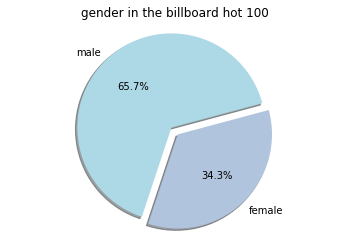

In [61]:
#charting the total number of men and women on the billboard hot 100
male, female= dfGender['gender'].value_counts()
gender_chart = [male,female]

my_labels = 'male','female',
my_colors = ['lightblue','lightsteelblue']
my_explode = (0.1, 0)
plt.pie(gender_chart, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('gender in the billboard hot 100')
plt.axis('equal')
plt.show()

In [62]:
#merging the gender data with the week and year data
dfM = pd.merge(dfSimple, dfGender, on="Performer", how='left')
dfM= dfM.dropna(subset= ['gender'])
dfM['WeekID'] = dfM['WeekID'].str[-4:-1]
dfM

,WeekID,Performer,gender
0,199,Jane Child,female
1,201,Jason Derulo,male
4,198,Gloria Estefan,female
5,196,Dickey Lee,male
6,200,Frankie J,male
...,...,...,...
23391,201,Chris Brown,male
23398,201,Future,male
23401,196,Paul Anka,male
23404,198,Bill Champlin,male


In [63]:
#breaking up the data into groups by decade
fifties = dfM.loc[dfM['WeekID'] == '195']
sixties = dfM.loc[dfM['WeekID'] == '196']
seventies = dfM.loc[dfM['WeekID'] == '197']
eighties = dfM.loc[dfM['WeekID'] == '198']
nineties = dfM.loc[dfM['WeekID'] == '199']
oughts = dfM.loc[dfM['WeekID'] == '200']
tens = dfM.loc[dfM['WeekID'] == '201']

In [64]:
#breaking up the data into groups by decade and by gender
m50= len(fifties.loc[fifties['gender'] == 'male'])
f50= len(fifties.loc[fifties['gender'] == 'female'])
m60= len(sixties.loc[sixties['gender'] == 'male'])
f60= len(sixties.loc[sixties['gender'] == 'female'])
m70= len(seventies.loc[seventies['gender'] == 'male'])
f70= len(seventies.loc[seventies['gender'] == 'female'])
m80= len(eighties.loc[eighties['gender'] == 'male'])
f80= len(eighties.loc[eighties['gender'] == 'female'])
m90= len(nineties.loc[nineties['gender'] == 'male'])
f90= len(nineties.loc[nineties['gender'] == 'female'])
m00= len(oughts.loc[oughts['gender'] == 'male'])
f00= len(oughts.loc[oughts['gender'] == 'female'])
m10= len(tens.loc[tens['gender'] == 'male'])
f10= len(tens.loc[tens['gender'] == 'female'])

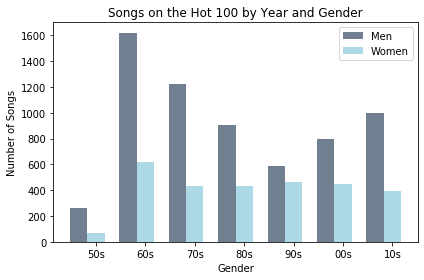

In [65]:
#plotting the number of songs on the hot 100 by men and women
N = 7
men = (m50, m60, m70, m80, m90, m00, m10)
women= (f50, f60, f70, f80, f90, f00, f10)

fig, ax = plt.subplots()
ind = np.arange(N)    
width = 0.35         

p1 = plt.bar(ind, men, width, color='slategray',label='Men')

rects2 = plt.bar(ind + width, women, width, color='lightblue',label='Women')

#labelling the graph
plt.xlabel('Gender')
plt.ylabel('Number of Songs')
plt.title('Songs on the Hot 100 by Year and Gender')
plt.xticks(ind + width, ('50s', '60s', '70s', '80s', '90s', '00s', '10s'))
plt.legend()

plt.tight_layout()
plt.show()